<a href="https://colab.research.google.com/github/nikodimov/arduino/blob/main/%D0%9A%D0%BE%D0%BF%D0%B8%D1%8F_%D0%B1%D0%BB%D0%BE%D0%BA%D0%BD%D0%BE%D1%82%D0%B0_%22%D0%91%D0%B0%D0%B7%D0%BE%D0%B2%D1%8B%D0%B9_%D0%B1%D0%BB%D0%BE%D0%BA_%7C_%D0%92%D0%B2%D0%B5%D0%B4%D0%B5%D0%BD%D0%B8%D0%B5_%D0%B2_%D0%BD%D0%B5%D0%B9%D1%80%D0%BE%D0%BD%D0%BD%D1%8B%D0%B5_%D1%81%D0%B5%D1%82%D0%B8_%D0%9B%D0%B8%D0%BD%D0%B5%D0%B9%D0%BD%D1%8B%D0%B9_%D1%81%D0%BB%D0%BE%D0%B9_(Dense)_%7C_%D0%94%D0%97_Ultra_Pro_%7C_%D0%A3%D0%98%D0%98%22.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Задание

Распознайте рукописную цифру, написанную на листе от руки.
Последовательность шагов следующая:

*   На бумаге рисуем произвольную цифру (желательно нарисовать цифру размером не 
более 5 * 5 мм и без наклона. В занятии нейронка обучалась на цифрах американских студентов. Эти цифры были написаны на тетрадных листах в клетку и имели схожий размер).
*   Фотографируем. Загружаем фото в Collaboratory.
*   С помощью функции image.load_img(path, target_size=(28, 28), color_mode = ‘grayscale’) загружаем картинку в переменную.
*   С помощью функции image.img_to_array(img) преобразуем изображение в numpy-массив.
*   Выполняем инверсию цветов, нормирование и решейп массива.
*   Выполняем распознавание собственной рукописной цифры.

Примечание: точность распознавания рукописных цифр может быть достаточно низкой, т.к. рукописные цифры после преобразований хоть и похожи на содержащиеся в базе, но могут отличаться по конфигурации, толщине линий и т.д.


In [5]:
# Ваше решение
from tensorflow.keras.datasets import mnist     # Библиотека с базой рукописных цифр
from tensorflow.keras.models import Sequential  # Подключение класса создания модели Sequential
from tensorflow.keras.layers import Dense       # Подключение класса Dense - полносвязный слой
from tensorflow.keras import utils              # Утилиты для подготовки данных
import numpy as np                              # Работа с массивами
import matplotlib.pyplot as plt                 # Отрисовка изображений
#from google.colab import files                  # Работа с файлами
from tensorflow.keras.preprocessing import image # Подключение библиотеки для загрузки изображений
import os                                       # Подключение модуля для работы с файлами
from PIL import Image 

# Отрисовка изображений в ячейках ноутбука
%matplotlib inline 

# Загрузка из облака данных Mnist
(x_train_org, y_train_org), (x_test_org, y_test_org) = mnist.load_data()

# Изменение формы входных картинок с 28х28 на 784
# первая ось остается без изменения, остальные складываются в вектор
x_train = x_train_org.reshape(x_train_org.shape[0], -1)   

# Проверка результата
print(f'Форма обучающих данных: {x_train_org.shape} -> {x_train.shape}')

# Нормализация входных картинок
# Преобразование x_train в тип float32 (числа с плавающей точкой) и нормализация
x_train = x_train.astype('float32') / 255.

# Задание константы количества распознаваемых классов
CLASS_COUNT = 10

# Преобразование ответов в формат one_hot_encoding
y_train = utils.to_categorical(y_train_org, CLASS_COUNT)
y_test = utils.to_categorical(y_test_org, CLASS_COUNT)


# Создание последовательной модели
model = Sequential()

# Добавление полносвязного слоя на 800 нейронов с relu-активацией
model.add(Dense(800, input_dim=784, activation='relu')) 

# Добавление полносвязного слоя на 400 нейронов с relu-активацией
model.add(Dense(400, activation='relu')) 

# Добавление полносвязного слоя с количеством нейронов по числу классов с softmax-активацией
model.add(Dense(CLASS_COUNT, activation='softmax')) 

# Компиляция модели
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# Вывод структуры модели
print(model.summary())

model.fit(x_train, y_train, batch_size=128, epochs=50, verbose=1)


Форма обучающих данных: (60000, 28, 28) -> (60000, 784)
Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_3 (Dense)             (None, 800)               628000    
                                                                 
 dense_4 (Dense)             (None, 400)               320400    
                                                                 
 dense_5 (Dense)             (None, 10)                4010      
                                                                 
Total params: 952,410
Trainable params: 952,410
Non-trainable params: 0
_________________________________________________________________
None
Epoch 1/50
469/469 [==============================] - 9s 19ms/step - loss: 0.2033 - accuracy: 0.9397
Epoch 2/50
469/469 [==============================] - 9s 19ms/step - loss: 0.0762 - accuracy: 0.9764
Epoch 3/50
469/469 [=============================

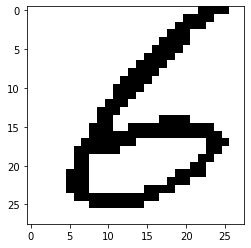


1/1 [==============================] - 0s 58ms/step
[[4.13781058e-15 7.07176635e-12 1.13740616e-23 6.95006481e-17
  1.52393244e-26 1.05096787e-01 8.94895017e-01 8.25752250e-06
  2.25354170e-18 1.84015128e-17]]

Распознанно число:  6
Вероятность:        0.894895


In [6]:
# Путь к директории с базой
base_dir = '/content'
img_name = 'num_6.bmp'
# Задание высоты и ширины загружаемых изображений
img_height = 28
img_width = 28

# Загрузить распознаваемое изображение
img_org = image.load_img(base_dir + '/' + img_name, 
                        target_size=(img_height, img_width), 
                        color_mode='grayscale')

# Отобразить загруженную картинку
plt.imshow(img_org, cmap='gray')
plt.show()
print()

# Преобразовать изображение в numpy-массив 
img = image.img_to_array(img_org)

# Добавление одной оси в начале, чтобы нейронка могла распознать пример
# Массив из одного примера, так как нейронка принимает именно массивы примеров (батчи) для распознавания
img_norm = np.expand_dims(img, axis=0)

# Изменение формы входных картинок с 28х28 на 784
# первая ось остается без изменения, остальные складываются в вектор
img_norm1 = img.reshape(img_norm.shape[0], -1)   

# Преобразование в тип float32 (числа с плавающей точкой) и нормализация
img_norm1 = img_norm1.astype('float32') / 255.

# Проверка формы данных
#print(img_norm1.shape)

# Распознавание примера
prediction = model.predict(img_norm1) 

# Вывод результата - вектор из 10 чисел
print(prediction)

# Найти максимальное число 
max_value = np.amax(prediction)
# Найти индекс максимального числа 
max_index = np.argmax(prediction)

# Вывести результаты распознавания
print()
print('Распознанно число: ', max_index)
print('Вероятность:       ', max_value)
